# Kuvitteellisen epidemian malli

Tekemäni mallin antamia tuloksia.

<img src="koko_kausi_sairastuneet.png" alt="sairastuneet" width="500" height="600"> 

<img src="aalto1_sairastuneet.png" alt="sairastuneet" width="500" height="600"> 

Oireettomat tartunnan saaneet kulkevat 'vapaana': "Vähän köhää, ei haittaa menoa." Oireettomat levittämät tautia. Oireettomien määrästä ei ole tilastotietoa.

Havaitut tartunnan saaneet ovat karanteenissa joko kotona tai sairaalahoidossa. Eivät levitä tautia. Karanteenissa olijoiden määrä tilastoidaan päivittäin.

Mitään testauksia ei tehdä.

Vaikka malli ei vastaa mitään todellista epidemiaa, tuloksista näkyy epidemioille tyypillinen piirre: Epidemia leviää eksponentiaalisesti, ellei laumasuoja tai ihmisten käytös pysäytä sen leviämistä, jolloin se alkaa hiipua eksponentiaalisesti.

Toinen yleinen piirre on, että rajoitustoimenpiteiden alettua havaittujen sairaustapausten määrä saattaa vielä nousta. Sairastunut levittää tautia tartunnan jälkeen ennen kuin oireet alkavat ja jos vakavat oireet kehittyvät vähitellen, sairaalaan joudutaan monen päivän, ehkä viikon parin viiveellä.

Vastaavasti epidemian hidastuminen näkyy viiveellä. 

<img src="koko_kausi_immuunit.png" alt="immuunit" width="500" height="600"> 

Sekä 'oireettomasti' sairastaneet että karanteenissa olleet saavat immuniteetin joksikin aikaa. 

# Sisällysluettelo

- <a href='#malliyhtalot'>Malliyhtälöt</a>
- <a href='#Numeerinen-simulointi'>Numeerinen simulointi</a>
- <a href='#Epidemian-simulointi'>Epidemian simulointi</a>
    - <a href='#Simuloinnin-tuloksia'>Simuloinnin tuloksia</a>
- <a href='#Mallin-parametrien-estimointi'>Mallin parametrien estimointi</a>
- <a href='#Estimoinnin-tuloksia'>Estimoinnin tuloksia</a>
- <a href='#linkkeja'>Linkkejä</a>

# Tämän jutun lähtökohta ja tarkoitus

Tämä juttu ei ole tiedettä eikä perustu epidemiologian asiantuntemukseen. Kirjallisuuskatsauksen sijaan surfailin netissä ja vilkuilin kiinnostavan näköisiä artikkeleita.

Lukaisin wikipediasta [jutun epidemioiden mallintamisesta](https://en.wikipedia.org/wiki/Compartmental_models_in_epidemiology) ja tein sen innoittama yksinkertaisen mallin, jonka avulla voin tarkistaa ja selittää **omia uskomuksiani** epidemioista ja niiden mallintamisesta. Uskomukset konkretisoituvat, kun verryttelee ajatuksiaan vaikka yksinkertaisenkin mallin kanssa leikkimällä.

Luulojaan ja uskomuksiaan on helpompi arvioida ja niistä on helpompi keskustella, kun ne kirjoittaa auki matemaattiseen muotoon ja simuloi niiden seurauksia muutenkin kuin päässälaskuna tai intuition varaisesti luulemalla.

Tämä juttu ei siis ole koko totuus — jos totuus ensinkään — epidemioista ja niiden  mallintamisesta. Enintään minun totuuteni.

Paremmin epidemian leviämistä havainnollistaisi hyvin tehty pelintapainen agenttimalli, jossa simuloidaan vaikkapa muutaman tuhannen olion liikkeitä ja kohtaamisia. Sellaiseen malliin on helppo sisällyttää monenlaisia olioiden käyttäytymisen ja epidemioiden tyypillisiä piirteitä.

Työlästä toki olisi saada olioiden käytös vastaamaan kvantitatiivisesti tosimaailman ihmisten käyttäytymistä niin tarkasti, että mallilla olisi varsinaista ennustearvoa, mutta jo oikeansuuntainen kvalitatiivinen näkemys ilmiöstä auttaa tekemään parempia johtopäätöksiä.

Kokeilemalla eri strategioita epidemian hillitsemiseksi pelaaja saisi kuitenkin tuntumaa epidemioiden perusluonteeseen. Pelaaminen parantaisi ihmisten mieleensä luomia kuvitelmia ja uskomuksia — ajatusmalleja — epidemioista.

[Omaa agenttimalliani](/html/Simulaatiow.html#hcuglttfq_ttl) en kehittänyt kiehtovaksi peliksi saakka enkä muutenkaan kovin pitkälle ja sen 'dokumentointikin' jäi kevyeksi pakinaksi. On siinä silti peruasioita kvalitatiivisesti kohdallaan.

# Python-ohjelman alustuksia

Tämä juttu on samalla python-kielinen ohjelma, joten yksikään rivi mallistani ei jää pimentoon. 

Ohjelmoinnista kiinnostuneille: Sovellan symbolista ja numeerista laskentaa. Kuvaajien piirtämiseen en satsannut yhtään ylimääräistä.


In [1]:
# from IPython.display import display

# numeerisen laskennan moduli
import numpy as np
# symbolisen laskennan moduli
import sympy as sp
# funktio mallin parametrien estimointiin
from scipy.optimize import minimize
# moduli kuvaajien piirtelyyn
import matplotlib.pyplot as plt

sp.init_printing()
# from sympy.printing.pycode import pycode

Symbolisen laskennan `sympy` modulille pitää kertoa, mitkä muuttujat ja funktiot ovat symbolisia. 

In [2]:
N, t, b_0, l_I, l_IQ, l_Q, l_RS, c_b = \
        sp.symbols('N t beta_0 lamda_I lamda_IQ lamda_Q lamda_RS c_b')

S = sp.Function('S')
I = sp.Function('I')
Q = sp.Function('Q')
R = sp.Function('R')
b = sp.Function('beta')

# Malliyhtälöt <a id='malliyhtalot' />


## Tartunnalle alttiit 

/home/puudeli/venv39/lib64/python3.9/site-packages/IPython/lib/latextools.py:126: MatplotlibDeprecationWarning: 
The to_png function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use mathtext.math_to_image instead.
  mt.to_png(f, s, fontsize=12, dpi=dpi, color=color)
/home/puudeli/venv39/lib64/python3.9/site-packages/IPython/lib/latextools.py:126: MatplotlibDeprecationWarning: 
The to_rgba function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use mathtext.math_to_image instead.
  mt.to_png(f, s, fontsize=12, dpi=dpi, color=color)
/home/puudeli/venv39/lib64/python3.9/site-packages/IPython/lib/latextools.py:126: MatplotlibDeprecationWarning: 
The to_mask function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use mathtext.math_to_image instead.
  mt.to_png(f, s, fontsize=12, dpi=dpi, color=color)
/home/puudeli/venv39/lib64/python3.9/site-packages/IPython/lib/latextools.py:126: MatplotlibDep

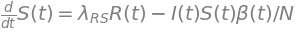

In [3]:
eq0 = sp.Eq(sp.diff(S(t), t), -b(t)*I(t)*S(t)/N + l_RS*R(t))
display(eq0)

$ N: $ Väestön suuruus

$ S(t): $ Hetkellä $t$ tartunnalle alttiiden lukumäärä

$ I(t): $ Oireettomat sairaat, jotka voivat tartuttaa muita

$ R(t): $ Parantuneet. Ovat aluksi immuuneja

$ \lambda_{RS} $: vauhti, jolla immuniteetti häviää ja parantuneet tulevat uudestaan alttiiksi tartunnalle

$ \beta: $ 'Todennäköisyys' tartunnalle. Riippuu osin viruksen ominaisuuksista, osin ihmisten käyttäytymisestä. Rajoituksilla vaikutetaan tähän.  

## Tartunnat

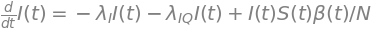

In [4]:
eq1 = sp.Eq(sp.diff(I(t), t), b(t)*I(t)*S(t)/N - l_I*I(t) - l_IQ*I(t))
display(eq1)

$ \lambda_{I}: $ 'Vauhti', jolla oireettomat parantuvat. Keskimääräisen sairauden keston käänteisluku.

$ \lambda_{IQ}: $ 'Vauhti', jolla oireettomia saadaan karanteeniin.

Malliin voisi lisätä ulkopuolelta tulevan taudinkantajien virran. 

## Sairaalaan tai karanteeniin joutuneet

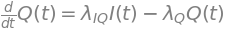

In [5]:
eq2 = sp.Eq(sp.diff(Q(t), t), l_IQ*I(t) - l_Q*Q(t))
display(eq2)

$ Q(t): $ Sairastuneet, jotka ovat karanteenissa joko kotonaan tai sairaalahoidossa

$ \lambda_Q: $ 'Vauhti', jolla karanteenista tai sairaalasta vapaudutaan. Keskimääräisen sairauden keston käänteisluku.

Tällaista ryhmää ei wikipedian esittelemissä malleissa ollut. Ainakin covid19-pandemiassa tyypillistä on, että moni sairastaa taudin huomaamattaan, mutta tartuttaa kuitenkin muita. Minun mallissani I edustaa heitä ja Q edustaa karanteeniin ja tautitilastoon päässeitä.

Ryhmän I suuruutta tietyllä hetkellä voidaan arvioida positiivisten testien perusteella, mikäli testaukset suunnataan tilastollisesti edustavasti. Käytännössä testaus suunnataan vaikuttavuuden perusteella, joten testitulosten perusteella ei voi päätellä sairastuneiden kokonaismäärää. 

Jälkikäteen oireettomien osuutta voidaan arvioida vasta-ainetestien perusteella. En tiedä, miten tarkasti.

Tässä jutussa oletukseni on, että mitään testauksia ei tehdä.

## Parantumiset

Mallissani kaikki parantuvat ja tulevat immuuneiksi. Immuniteetti ei kuitenkaan ole pysyvä, vaan kerran sairastuneet tulevat vähitellen uudelleen altiiksi taudille.


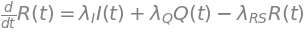

In [6]:
eq3 = sp.Eq(sp.diff(R(t), t), l_I*I(t) + l_Q*Q(t) - l_RS*(R(t)))
display(eq3)

$ R(t) $: Parantuneet

## Tartuttavuus ja sen hallinta

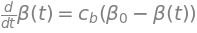

In [7]:
eq4 = sp.Eq(sp.diff(b(t), t), c_b*(b_0 - b(t)))
display(eq4)

Rajoitustoimet eivät todellisuudessa vaikuta silmänräpäyksessä, joten suodatan rajoitusten aiheuttamaa tarttuttavuuden $\beta_0$ muutosta.

Käytännön merkitystä tällä ei liene, mutta simuloinnin tulokset näyttivät hassuilta, kun epidemian jyrkkä kasvu kääntyi hetkessä jyrkäksi laskuksi.

## Puutteita

Malli olettaa, että kenen hyvänsä kahden ihmisen tartuntaan johtava kohtaaminen on yhtä todennäköistä. Todellisuudessa kohtaamiset riippuvat asuinpaikasta, iästä, työstä, harrastuksista, ... Epidemia ei leviä tasavauhtia koko väestöön ja usein esiintyy jollain seudulla tai jossain erityisryhmässä tartuntaryppäitä.

R:n, I:n ja Q:n pitäisi siis olla jakaumia tai jaettuna useaan ryhmään. Webistä löytyy monenlaisia malleja, joissa tällaista on kokeiltu. Sellaisen kokeilu ei kuulu tämän jutun piiriin.

Agenttimallissa, jossa simuloidaan erikseen tuhansien olioiden 'elämää', tulee automaattisesti erille sijainnin ja liikkumisen vaikutus. Olioille on myös helppo antaa erilaisia ominaisuuksia niin, että ne edustavat eri ryhmiä.

In [8]:
eqs = [eq0, eq1, eq2, eq3, eq4]

# Numeerinen simulointi

Mallini on differentiaaliyhtälöryhmä. Simulointi tarkoittaa differentiaaliryhmän ratkaisemista. Poikkeustapauksissa differentiaaliyhtälöryhmälle löytyy analyyttinen ratkaisu, mutta yleensä pitää tyytyä numeeriseen ratkaisemiseeen.

## Periaate

Differentiaaliyhtälön $ \frac{d}{dt}y(t) = f(y(t), u(t), t) $ numeerista ratkaisua varten tarvitaan funktio `f(y, u, t)`, joka laskee derivaatan arvon. Sen jälkeen simulointi tehdään seuraavasti:

```python
Tf =  # simuloinnin loppuaika
dt =  # Integroinnin aika-askel
u =   # Parametreja ja ohjauksia, voivat olla ajan funktioita
N = int(Tf/dt) # Integrointiaskelten lukumäärä
# taulukko, johon talletetaan simuloinnin tulos ajan funktiona
yy = [0 for i in range(N)]
y[0] = y0

for i in range(N)
    t = i*dt
    u = laske_u(y(t), t)  # jos u ei ole vakio vaan riippuu y:stä ja t:stä
    y[i+1] = rk4(f, y[i], u, dt)  

```

Differentiaaliyhtälöiden numeeriseen ratkaisemiseen tarvitaan integrointirutiini. [Niitä on valmiina](https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.solve_ivp.html#scipy.integrate.solve_ivp), mutta kun en heti onnistunut niitä soveltamaan käytin omaa, kauan sitten uteliaisuudesta koodaamaani [Runge-Kutta](https://en.wikipedia.org/wiki/Runge%E2%80%93Kutta_methods) rutiinia.

In [9]:
def rk4(fdydt, yy, uu, dt):
    kk1 = fdydt(yy, uu)
    yk1 = [yy[i] + k1 * dt / 2.0 for i, k1 in enumerate(kk1)]
    kk2 = fdydt(yk1, uu)
    yk2 = [yy[i] + k2 * dt / 2.0 for i, k2 in enumerate(kk2)]
    kk3 = fdydt(yk2, uu)
    yk3 = [yy[i] + k3 * dt for i, k3 in enumerate(kk3)]
    kk4 = fdydt(yk3, uu)
    yy1 = [
        y + dt / 6.0 * (kk1[i] + 2.0 * kk2[i] + 2.0 * kk3[i] + kk4[i])
        for i, y in enumerate(yy)
    ]
    return yy1

## Funktio epidemian simulointiin

Vilkaistaan uudestaan epidemiayhtälöitäni ja 'copy-pastetaan' niistä simuloinnissa tarvittava funktio

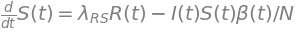

lamda_RS*R(t) - I(t)*S(t)*beta(t)/N 



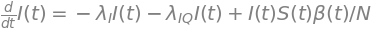

-lamda_I*I(t) - lamda_IQ*I(t) + I(t)*S(t)*beta(t)/N 



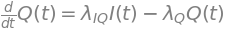

lamda_IQ*I(t) - lamda_Q*Q(t) 



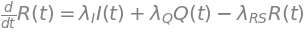

lamda_I*I(t) + lamda_Q*Q(t) - lamda_RS*R(t) 



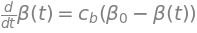

c_b*(beta_0 - beta(t)) 



In [10]:
for eq in eqs:
    display(eq)
    print(eq.rhs, '\n')

In [11]:
# funktio, joka laskee muuttujien derivaatat

def dfdt(xx, uu):
    [S, I, Q, R, b] = xx
    [b_0, l_I, l_IQ, l_Q, l_RS, c_b, N] = uu
    
    dS = l_RS*R - I*S*b/N 
    dI = -l_I*I - l_IQ*I + I*S*b/N 
    dQ = l_IQ*I - l_Q*Q 
    dR = l_I*I + l_Q*Q - l_RS*R 
    db = c_b*(b_0 - b)
    
    return [dS, dI, dQ, dR, db]

# Epidemian simulointi

## 'Strategia' pandemian hillitsemiseen

Seuraava 'viranomainen' muuttelee parametriä $\beta_0$, joka kuvaa tartuntojen todennäköisyyttä.

Alussa epidemian annetaan levitä, kunnes `self.ylim` osa väestöstä on sairaana, jolloin epidemiaa aletaan hillitä rajoitustoimin niin, että altistusten määrä vähenee perusarvosta `self.ry = r0` arvoon `self.ra1`.

Rajoitustoimista luovutaan, kun sairastuneiden määrä on laskenut `self.alim` osaan väestöstä.

Toistetaan sama rajoituksella `self.ra2`.

Toisen aallon jälkeen luovutaan rajoituksista ja annetaan epidemian levitä vapaasti, kunnes saavutetaan laumasuoja, joka sekin vähitellen häviää ja tulee seuraava aalto.

In [12]:
class Cl_ohjaus:
    def __init__(self, vaesto, b_0):
        self.vaihe = 'nousu1'
        self.ylim = 5.0*vaesto/1000.0
        self.alim = 0.2*self.ylim
        self.ry = b_0
        self.ra1 = 0.3*b_0
        self.ra2 = 0.4*b_0
        
    def rajoitukset(self, sairaat):
# aalto 1
        if self.vaihe == 'nousu1':
            if sairaat < self.ylim:
                R = self.ry
            else:
                R = self.ra1
                self.vaihe = 'lasku1'
        elif self.vaihe == 'lasku1':
            if sairaat > self.alim:
                R = self.ra1
# aalto 2
            else:
                R = self.ry
                self.vaihe = 'nousu2'
        elif self.vaihe == 'nousu2':
            if sairaat < self.ylim:
                R = self.ry
            else:
                R = self.ra2
                self.vaihe = 'lasku2'
        elif self.vaihe == 'lasku2':
            if sairaat > self.alim:
                R = self.ra2
# aalto 3
            else:
                R = self.ry
                self.vaihe = 'nousu3'
        else:
            R = self.ry
        
        return R

In [13]:
# Kootaan mallin parametrit yhteen paikkaan.
class Cl_par:
    def __init__(self):
        self.N = 1.0e+5  # väestön määrä
        self.dur1 = 12.0 # oireettoman sairauden kesto
        self.dur2 = 18.0 # lisäaika vaikeammin sairastuneille
        self.dur3 = 400.0 # lisäaika vaikeammin sairastuneille
        self.b_0 = 0.2  # 
        self.c_b = 0.2  # 
        self.l_I = 1.0/self.dur1
        self.l_IQ = 0.04  # kerroin, joka kuvaa vakavasti sairastuvien osuutta tartunnan saaneista
        self.l_Q = 1.0/self.dur2
        self.l_RS = 1.0/self.dur3  # kerroin, joka kuvaa 
        self.dt = 1.0  # integroinnin aika-askel. Olkoon vaikka päiviä

par = Cl_par()

# luodaan 'strategia-agentti'
ohjaus = Cl_ohjaus(par.N, par.b_0)

In [14]:
# Funktio, joka simuloi systeemiä ajan T
def simulate(T):

    # Simuloinnin alku: Koko väestö altis — vailla immuniteettia, yksi oireeton sairas
    xx = [par.N, 1.0, 0.0, 0.0, par.b_0] 

    uu = [par.b_0, par.l_I, par.l_IQ, par.l_Q, par.l_RS, par.c_b, par.N]

    # Luodaan taulukot, joihin talletetaan simuloinnin tulos
    SS = [0 for i in range(T)]
    II = [0 for i in range(T)]
    QQ = [0 for i in range(T)]
    RR = [0 for i in range(T)]
    bb = [0 for i in range(T)]

    SS[0] = xx[0]
    II[0] = xx[1]
    QQ[0] = xx[2]
    RR[0] = xx[3]
    bb[0] = xx[4]

    for i in range(T):
        uu[0] = ohjaus.rajoitukset(xx[2])
        xx = rk4(dfdt, xx, uu, par.dt)
        SS[i] = xx[0]
        II[i] = xx[1]
        QQ[i] = xx[2]
        RR[i] = xx[3]
        bb[i] = xx[4]

    return (SS, II, QQ, RR, bb)

## Funktio kuvaajien piirtämiseen

Funktio, jolla piirretään epidemian etenemistä tietyllä aikavälillä havainnollistavat kuvaajat.

In [15]:
def plot(title, SIQRb, t0, t1):
    dt = par.dt
    (SS, II, QQ, RR, bb) = SIQRb
    tt = [i*dt for i in range(len(II))]
    plt.plot(tt[t0:t1], II[t0:t1], label='oireettomat')
    plt.plot(tt[t0:t1], QQ[t0:t1], label='karanteenissa')
    plt.title('Sairastuneet')
    plt.legend()
    plt.grid(True)
    plt.tick_params(axis='both', colors='green')
    fname = title+'_sairastuneet.png'
    plt.savefig(fname, format='png')
    plt.show()

    plt.plot(tt[t0:t1], RR[t0:t1], label='immuunit')
    # plt.plot(tt[t0:t1], SS[t0:t1], label='alttiit')
    plt.legend()
    plt.grid(True)
    plt.title('immuunit')
    plt.tick_params(axis='both', colors='green')
    fname = title+'_immuunit.png'
    plt.savefig(fname, format='png')
    plt.show()

    plt.plot(tt[t0:t1], bb[t0:t1], label='tarttuvuus')
    # plt.plot(tt[t0:t1], SS[t0:t1], label='alttiit')
    plt.legend()
    plt.grid(True)
    plt.title('tarttuvuus')
    plt.tick_params(axis='both', colors='green')
    plt.show()
    

## Simuloinnin tuloksia

### koko kausi

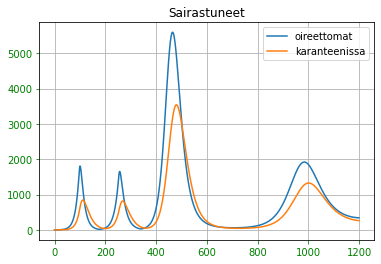

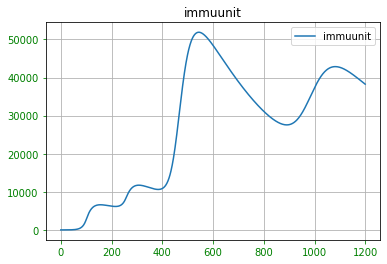

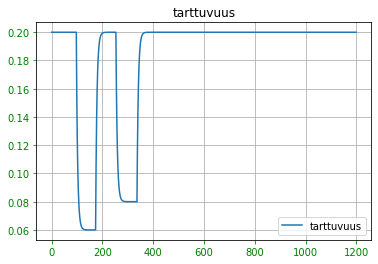

In [16]:
T = 1200
SIQRb = simulate(T)
plot('koko_kausi', SIQRb, 0, T)

Epidemiat ovat epästabiileja ilmiöitä, jotka joko leviävät tai taantuvat eksponentiaalisesti.

### Ensimmäinen aalto

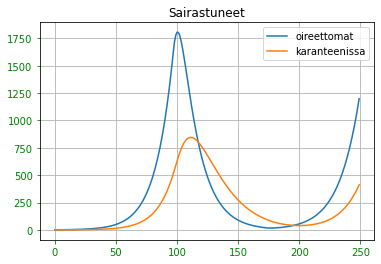

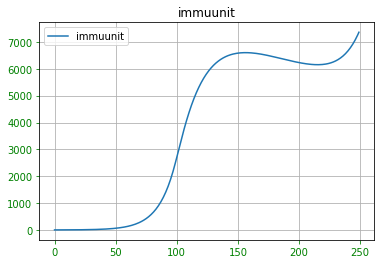

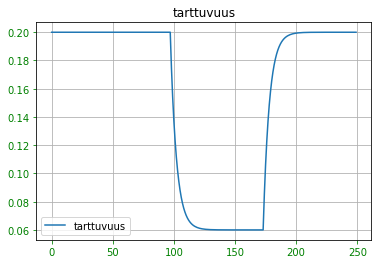

In [17]:
plot('aalto1', SIQRb, 0, 250)

### Toinen aalto

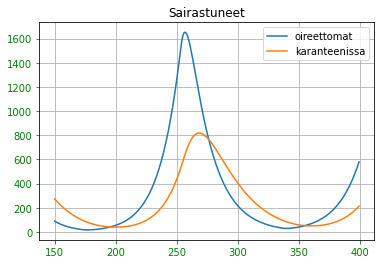

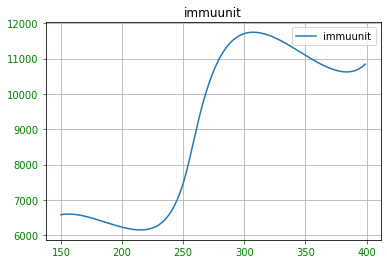

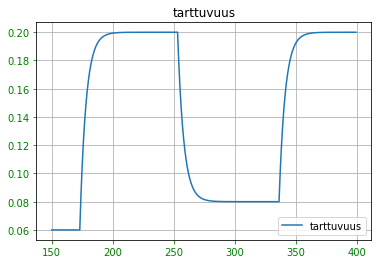

In [18]:
plot('aalto2', SIQRb, 150, 400)

# Mallin parametrien estimointi

Ydinvoimaloista voidaan tehdä tarkkoja malleja fysiikan lakien perusteella. Meteorologian ilmiöistäkin voidaan tehdä tarkkoja malleja luonnonlakien perusteella. Esimerkiksi kaikki mallinnuksessa tarvittavat vesihöyryn ominaisuudet on selvitetty kokeellisesti aika päiviä sitten.

Viruksen — erityisesti uudenlaisen viruksen — käyttäytymisestä ei ole tarkkoja tietoja. Kaikki epidemiat leviävät jossain määrin samantyyppisesti, mutta toiset tarttuvat paljon toisia herkemmin ja tartuntamekanismit ovat erilaisia. Toisista parantuu nopeammin, toisista hitaammin. Toiset tappavat herkemmin kuin toiset. Joillekin tulee immuuniksi, toisille ei.

Epidemian leviäminen riippuu ihmisten käytöksestä. Sen vaikutusta on vaikea mallintaa varsinkin, jos väestöllä ei ole aiempaa kokemusta vastaavasta. Epidemian kestäessä ihmisten käytös muuttuu. Epidemioita ei siis voi mallintaa tarkasti luonnonlakien pohjalta. 

(Talous on muuten pitkälti ihmistiede. Silti taloudesta on onnistuttu laatimaan hyödyllisiä malleja. Olisi toki hyvä tietää, mihin talousmallit perustuvat.)

Epidemioista kannattaa tehdä melko yksinkertainen malli, joka kuvaa epidemioiden tyyppilliset peruspiirteet ja sitten sovittaa mallin parametrit kulloisenkin epidemian etenemisestä kerättyyn dataan.

Jos mallin saa sovitettua kohtuullisen hyvin dataan, sillä voi ennustaa lähitulevaisuutta olettaen, ettei virus eikä väestön käytös isommin muutu. 

Parametrien estimointia kannattaa tehdä jatkuvasti sekä tuoreinta että pitkän aikavälin dataa käyttäen. Jos ennustevirhe alkaa kasvaa voi arvella tilanteen muuttuneen ja mallin ennustearvon huonontuneen. Estimoimalla parametreja eri ajanjaksoilta, voi saada tunnuslukuja erilaisten rajoitustoimien vaikutuksesta. Näkeehän sen datasta suoraankin, mutta parametrien estimointi voi antaa lisävihjeitä rajoitusten vaikutuksesta.

Jos malliin lisäisi parametrin kuvaamaan ulkopuolelta tulevien tartuttajien virtaa, parametrien estimaateista voisi ehkä päätellä, johtuuko tartuntojen lisääntyminen tai vähentyminen 1) viruksen ja ihmisten käytöksen muutoksesta vai 2) ulkopuolelta tulevan virran muutoksesta. Mallin pitäisi rakenteltaan vastata melko hyvin epidemiaa ja estimointivirheen pitäisi olla pieni.

## Parametrien estimoinnin perusidea

Parametrien estimointi on oma tieteen — vähän taiteenkin — -alansa. Käytän ns. härmäläistä lähestymistapaa periaatteen havainnollistamiseksi.

Arvelemme, että sairastuneiden määrä noudattaa yhtälöä $ \frac{d}{dt}y(t) = f(\theta, y(t), u(t), t) $ 

Merkitään tilastoitua sairastuneiden määrää hetkellä  $ t=k \cdot dt $ seuraavasti 
$ y_m(k dt) = y_m(k)$

Malliyhtälön voidaan ennustaa suurinpiirtein oikein yhden aika-askelen päähän: $ y_e(k+1) = y_m(k) + f(\theta, y_m(k), u(k), k) dt $

Summataan ennustevirheiden neliöt
$$ e² = \sum_{k=k_0}^{k_f} (y_m(k+1) - y_e(k+1))^2 = \sum_{k=k_0}^{k_f} (y_m(k+1) - (y_m(k) + f(\theta, y_m(k), u(k), k) dt))^2 $$
Paras parametrien arvo löytyy derivoimalla ennustevirheen neliö $ \theta$:n suhteen ja ratkaisemalla derivaatan 0-kohta.

## Ennuste yhden aika-askeleen päähän

Kirjoitetaan funktio `estep()`, joka kertoo epidemiamallini muuttujien muutoksen yhdellä aika-askelella.

Korvataan $S(t)$ muuttujalla `Se` ja samoin muut niin selvitään myöhemmin vähemmällä käsityöllä.

Sijoitetaan tunnetuilla parametreille numeroarvot. Estimoimalla ei kannata yrittää hakea arvoa parametrille, jonka muutenkin tietää. 
Mitä monimutkaisempi malli ja mitä enemmän parametreja, sen paremmin se sopii tilastoituun dataan, mutta sitä vähemmän voi luottaa siihen, että se ennustaa kelvollisesti tulevaisuutta.

Kun mallin muuttujilla, parametreillä ja yhtälöillä on järkeenkäypä tulkinta eikä parametrejä ole tolkuttoman montaa, estimoimmin voi toivoa löytävän jotain oikeasti oleellista.

In [19]:
dt, Se, Ie, Qe, Re, be = sp.symbols('dt Se Ie Qe Re be')

esubs = [(S(t), Se), (I(t), Ie), (Q(t), Qe), (R(t), Re), (b(t), be)]

tunnetut = [(N, par.N), (c_b, par.c_b), (dt, par.dt)] # (l_Q, par.l_Q), (l_RS, par.l_RS), 

eqsdt = [eq.rhs.subs(esubs)*dt for eq in eqs]
eqsdt = [eq.subs(tunnetut) for eq in eqsdt]

Tulostetaan yhtälöt ja copy-pastetaan funktion`estep()` sisuksiin

In [20]:
display(eqsdt)
for eq in eqsdt:
    print(eq)

-1.0e-5*Ie*Se*be + 1.0*Re*lamda_RS
1.0e-5*Ie*Se*be - 1.0*Ie*lamda_I - 1.0*Ie*lamda_IQ
1.0*Ie*lamda_IQ - 1.0*Qe*lamda_Q
1.0*Ie*lamda_I + 1.0*Qe*lamda_Q - 1.0*Re*lamda_RS
-0.2*be + 0.2*beta_0


In [21]:
def estep(xx0, params):
    [Se, Ie, Qe, Re, be] = xx0
    [beta_0, lamda_I, lamda_IQ, lamda_Q, lamda_RS] = params  # , S0, I0, R0, b0
    return np.array([
        -1.0e-5*Ie*Se*be + 1.0*Re*lamda_RS,
        1.0e-5*Ie*Se*be - 1.0*Ie*lamda_I - 1.0*Ie*lamda_IQ,
        1.0*Ie*lamda_IQ - 1.0*Qe*lamda_Q,
        1.0*Ie*lamda_I + 1.0*Qe*lamda_Q - 1.0*Re*lamda_RS,
        -0.2*be + 0.2*beta_0
    ])

## Ennustevirheen neliö välillä T0 — Tf

Fuskaan pikkuisen. Oletan muuttujien arvot hetkellä T0 tunnetuiksi,vaikka alussa tekemäni oletuksen mukaan tilastotietoa on vain karanteenissa olevista. Muuttujien arvot hetkellä T0 voisi estimoida samalla kun parametritkin, mutta se vaatisi pikkuisen koodaamista.

Koska kukaan ei kuole eikä lapsia synny eikä kukaan kulje rajan yli, pätee $ N = S(t) + I(t) + Q(t) + R(t) $. Lisäsin minimoitavaksi termin $ \sum_{k=k_0}^{k_f}(N - (S(k) + I(k) + Q(k) + R(k)))²$, koska arvelin sen helpottavan numeerisen minimoinnin algoritmia. (En kuitenkaan jaksanut kunnolla kokeilla, mikä sen vaikutus on.)

In [22]:
def errfun(pars, T0, Tf, SIQRb):
#    [beta_0, lamda_I, lamda_IQ, S0, I0, R0, b0] = pars
    (SS, II, QQ, RR, bb) = SIQRb
    err = 0
    # pikku fusku
    xx0 = np.array([SS[T0], II[T0], QQ[T0], RR[T0], bb[T0]])
    xx1 = np.array([0, 0, 0, 0, 0])
    err2 = 0.0

    for i in range(T0, Tf):
        xx1 = xx0 + estep(xx0, pars)
        err2 = err2 + (QQ[i+1] - xx1[2])**2 + \
            (par.N - (xx1[0] + xx1[1] + xx1[2] + xx1[3]))**2
        xx0 = xx1
        
    return err2

## Ennustevirheen minimointi parametrien suhteen

Numeerinen minimointi vaatii alkuarvauksen estimoitaville parametreille. Käytin arvoja, jotka ovat lähellä simuloinnissa käyttämiäni. Vähän fuskua sekin. 

Systemaattisesti en alkuarvauksen vaikutusta selvitellyt, mutta eri alkuarvauksilla todennäköisesti tulee jonkin verran erilaisia tuloksia, koska käytän parametrien estimointiin ainoana 'tilastotietona' karanteeniin päätyneiden määrää. Suurin piirtein samanlaiseen karanteenipotilaiden määrään voidaan päätyä pienellä tai isolla oireettomien määrällä. 

Esimerkiksi oireettomien ja havaittujen suhteesta pitäisi olla jotain lisätietoa, että parametrien estimointi toimisi 'vakaammin'.

In [23]:
print(par.b_0, par.l_I, par.l_IQ, par.l_Q, par.l_RS)

0.2 0.08333333333333333 0.04 0.05555555555555555 0.0025


In [24]:
def estim(T0, Tf, SIQRb):
    (SS, II, QQ, RR, bb) = SIQRb
    # Alku-arvaus parametreille
    x0 = [0.15, 0.075, 0.03, 0.05, 0.0025] # , SS[T0], II[T0], RR[T0], bb[T0]

    optim = minimize(errfun, x0, args=(T0, Tf, SIQRb), method='Nelder-Mead', 
                     options={'disp': False}) # method='BFGS' 
    # display(optim)
    print(optim.message)

    print('\nparametrit välillä {} — {}'.format(T0, Tf))
    print('       malli — estimoitu')
    print('b_0:  {:6.3f} — {:6.3f}'.format(par.b_0, optim.x[0]))
    print('l_I:  {:6.3f} — {:6.3f}'.format(par.l_I, optim.x[1]))
    print('l_IQ: {:6.3f} — {:6.3f}'.format(par.l_IQ, optim.x[2]))
    print('l_Q:  {:6.3f} — {:6.3f}'.format(par.l_Q, optim.x[3]))
    print('l_RS:  {:6.3f} — {:6.3f}'.format(par.l_RS, optim.x[4]))
    print('\nvirhe yhdellä askeleella:  {:4e}'.format(optim.fun/(Tf - T0)))

## Estimoinnin tuloksia

In [25]:
estim(400, 1190, SIQRb)

Optimization terminated successfully.

parametrit välillä 400 — 1190
       malli — estimoitu
b_0:   0.200 —  0.194
l_I:   0.083 —  0.073
l_IQ:  0.040 —  0.048
l_Q:   0.056 —  0.068
l_RS:   0.003 —  0.003

virhe yhdellä askeleella:  2.561313e+02


In [26]:
estim(5, 95, SIQRb)

Optimization terminated successfully.

parametrit välillä 5 — 95
       malli — estimoitu
b_0:   0.200 —  0.178
l_I:   0.083 —  0.067
l_IQ:  0.040 —  0.032
l_Q:   0.056 —  0.033
l_RS:   0.003 —  0.002

virhe yhdellä askeleella:  1.046234e+00


In [27]:
estim(105, 170, SIQRb)

Optimization terminated successfully.

parametrit välillä 105 — 170
       malli — estimoitu
b_0:   0.200 —  0.066
l_I:   0.083 —  0.087
l_IQ:  0.040 —  0.038
l_Q:   0.056 —  0.055
l_RS:   0.003 —  0.003

virhe yhdellä askeleella:  1.001599e+00


## Huomioita

Koska käytin 'mittausdatana' samanalaisella mallilla luotua dataa kuin mitä käytin estimoinnin pohjana, tuloksesta ei voi päätellä muuta kuin, että algoritmissani ei ole varsinaisia virheitä. 

Mallini ja algoritmieni heikkoudet tulisivat esille, jos kaivaisin käyttööni todellista dataa covid-19 pandemiasta ja yrittäisin sovittaa malliani siihen. Siinä vaiheessa tämä puuha muuttuisi huvista työksi. Turhaksi työksi. Maailmalla näyttää tehdyn riittävän paljon työtä epidemiasta kertyvän datan hyödyntämiseen. 

# Linkkejä <a id='linkkeja'>

[Tämä notebook](/xml/Programming/Simulaatioita/Pandemia/SIQRpandemia.ipynb) |
[Agenttimallini](/html/Simulaatiow.html#hcuglttfq_ttl) |
[Etusivulle](/index.html)